In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('C:\\code\\activ')

In [80]:
path = "./documents/latent_vector/"

real_enc_out = pd.read_excel(path + 'real_enc.xlsx').iloc[:,1::]
basic_enc_out = pd.read_excel(path + 'basic_enc.xlsx').iloc[:,1::]
basic_form_enc_out = pd.read_excel(path + 'basic_formula_enc.xlsx').iloc[:,1::]
reinforce_enc_out = pd.read_excel(path + 'reinforce_enc.xlsx').iloc[:,1::]
ae_enc_out = pd.read_excel(path + 'ae_formula_enc.xlsx').iloc[:,1::]
dqn_enc_out = pd.read_excel(path + 'dqn_enc.xlsx').iloc[:,1::]
rein_gan_enc_out = pd.read_excel(path + 'reinforce_gan_enc.xlsx').iloc[:,1::]

In [45]:
round_w = 2

basic = np.round(basic_enc_out.iloc[:,1::].to_numpy(), round_w)
basic_form = np.round(basic_form_enc_out.iloc[:,1::].to_numpy(), round_w)
reinforce = np.round(reinforce_enc_out.iloc[:,1::].to_numpy(), round_w)
ae = np.round(ae_enc_out.iloc[:,1::].to_numpy(), round_w)
dqn = np.round(dqn_enc_out.iloc[:,1::].to_numpy(), round_w)
rein_gan = np.round(rein_gan_enc_out.iloc[:,1::], round_w)

all_result = [basic, basic_form, reinforce, ae, dqn, rein_gan]
inter = all_result[0]

for i in range(1, len(all_result)):
    inter = np.intersect1d(inter, all_result[i])

In [70]:
import random as rand
saving = []
temp = []
for i in range(1000):
    for j in range(3):
        temp.append(inter[rand.randrange(0, len(inter))])
    saving.append(temp)
    temp = []

In [83]:
import tensorflow as tf

decoder = tf.keras.models.load_model('./model/decoder.h5')
decode_saving = decoder.predict(saving)

dnn_model = tf.keras.models.load_model('./model/dnn.h5')

32/32 [==============================] - 0s 2ms/step


In [76]:
from sklearn.preprocessing import MinMaxScaler
d = pd.read_excel('./documents/aug_nine_var.xlsx').iloc[:,1:-1]
scaler = MinMaxScaler()
scaler.fit(d)

result = scaler.inverse_transform(decode_saving)

MinMaxScaler()

In [87]:
pop_result = dnn_model.predict(decode_saving)
df = np.append(result, pop_result, axis=1)

32/32 [==============================] - 0s 2ms/step


In [88]:
saving_pd = pd.DataFrame(df)
saving_pd.to_excel('./documents/result/ae_intersect_result.xlsx')

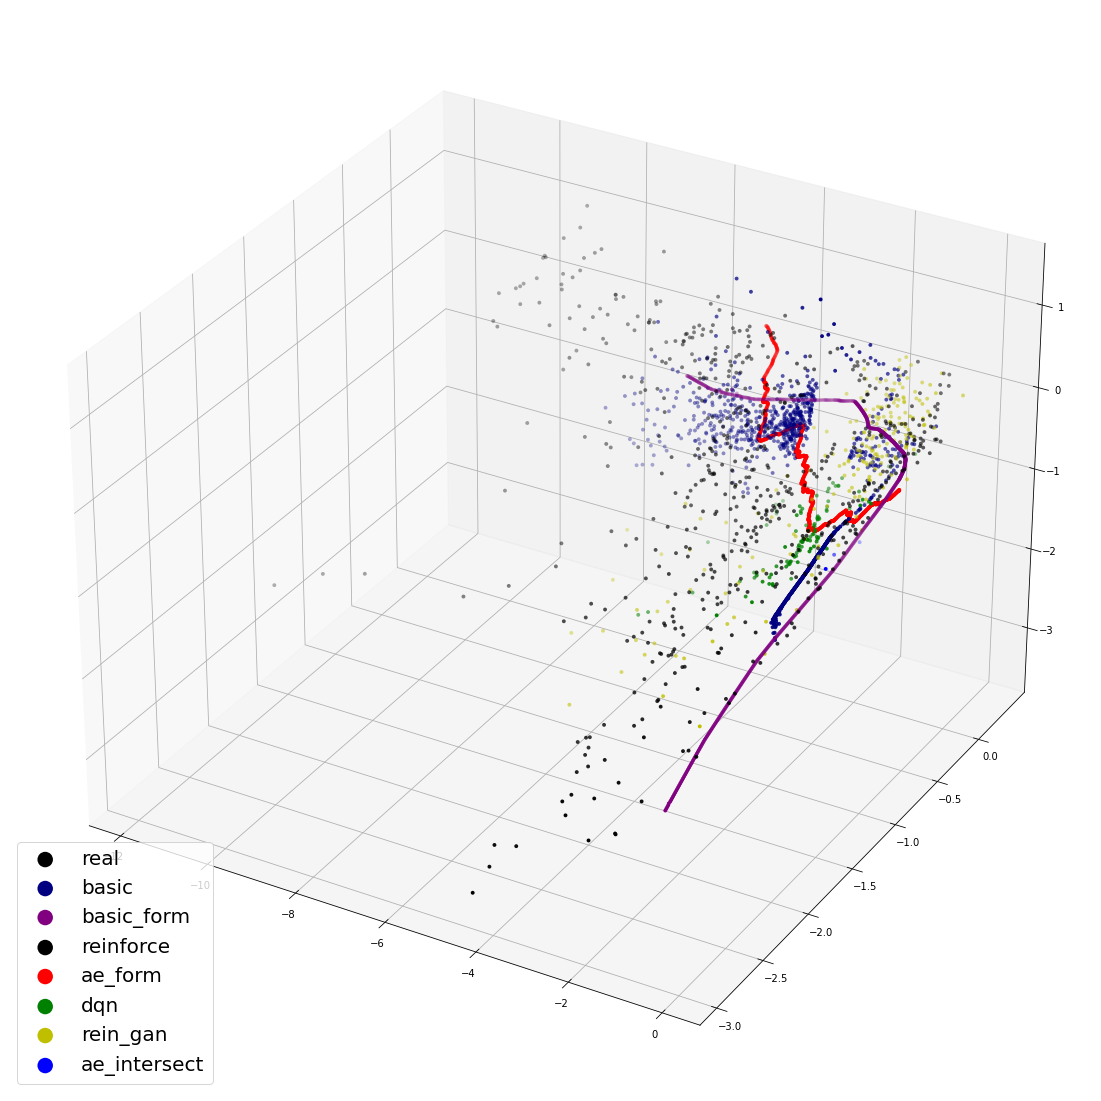

In [81]:
from matplotlib import animation

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

def init():
    ax.scatter(real_enc_out[0], real_enc_out[1], real_enc_out[2],
                    edgecolor='none', s=15, c='k', label='real')

    ax.scatter(basic_enc_out[0], basic_enc_out[1], basic_enc_out[2],
                    edgecolor='none', s=15, c='navy', label='basic')

    ax.scatter(basic_form_enc_out[0], basic_form_enc_out[1], basic_form_enc_out[2],
                    edgecolor='none', s=15, c='purple', label='basic_form')

    ax.scatter(reinforce_enc_out[0], reinforce_enc_out[1], reinforce_enc_out[2],
                    edgecolor='none', s=15, c='black', label='reinforce')

    ax.scatter(ae_enc_out[0], ae_enc_out[1], ae_enc_out[2],
                    edgecolor='none', s=15, c='r', label='ae_form')
    
    ax.scatter(dqn_enc_out[0], dqn_enc_out[1], dqn_enc_out[2],
                    edgecolor='none', s=15, c='g', label='dqn')

    ax.scatter(rein_gan_enc_out[0], rein_gan_enc_out[1], rein_gan_enc_out[2],
                    edgecolor='none', s=15, c='y', label='rein_gan')

    ax.scatter(saving[0], saving[1], saving[2],
                    edgecolor='none', s=15, c='b', label='ae_intersect')

    plt.legend(loc="lower left", markerscale=4., scatterpoints=1, fontsize=20)

    return fig, 

def animate(i):
    ax.view_init(elev=30., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


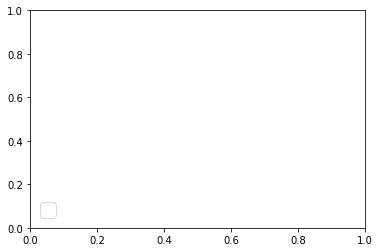

In [82]:
anim.save('using_all.gif', writer='pillow', fps=30)